In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
df = pd.read_csv('Etsy_webscrape.csv')
df

,Col1,Col3,Item quality,Shipping rating
0,Very beautiful earrings. Will definitely buy m...,Tina Sanders,5.0,5.0
1,Beautiful earrings. Fast shipping. Can’t wait ...,Tina Sanders,5.0,5.0
2,These earrings are absolutely beautiful.,thimsens,5.0,5.0
3,Stunning earrings they look absolutely beautif...,Sign in with Apple user,5.0,5.0
4,"Truly beautiful earrings, quick delivery and s...",jem,5.0,5.0
...,...,...,...,...
864,NaN,nafisy,NaN,NaN
865,NaN,nafisy,NaN,NaN
866,NaN,nafisy,NaN,NaN
867,NaN,nafisy,NaN,NaN


In [3]:
df[(pd.isna(df['Col1'])) & (pd.isna(df['Item quality'])) & (pd.isna(df['Shipping rating']))]

,Col1,Col3,Item quality,Shipping rating
22,NaN,Kimberly,NaN,NaN
23,NaN,Jayme,NaN,NaN
138,NaN,Kady M,NaN,NaN
140,NaN,Duc,NaN,NaN
142,NaN,Rachel,NaN,NaN
...,...,...,...,...
864,NaN,nafisy,NaN,NaN
865,NaN,nafisy,NaN,NaN
866,NaN,nafisy,NaN,NaN
867,NaN,nafisy,NaN,NaN


In [4]:
df1 = df[~(pd.isna(df['Col1']) & pd.isna(df['Item quality']) & pd.isna(df['Shipping rating']))]
df1

,Col1,Col3,Item quality,Shipping rating
0,Very beautiful earrings. Will definitely buy m...,Tina Sanders,5.0,5.0
1,Beautiful earrings. Fast shipping. Can’t wait ...,Tina Sanders,5.0,5.0
2,These earrings are absolutely beautiful.,thimsens,5.0,5.0
3,Stunning earrings they look absolutely beautif...,Sign in with Apple user,5.0,5.0
4,"Truly beautiful earrings, quick delivery and s...",jem,5.0,5.0
...,...,...,...,...
744,Very sparkly and well made. Love them.,Sarah Rittweger,NaN,NaN
745,"Beautiful earrings, and arrived promptly!",eloisevaisanen,NaN,NaN
746,Gorgeous earring! Simple and elegant.,lolajewel,NaN,NaN
747,Item as described. Shipped promptly. Thank you.,NaN,NaN,NaN


In [5]:
df1.rename(columns={'Col1': 'Reviews', 'Item quality': 'ItemRating', 'Shipping rating': 'ShippingRating'}, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_18984\1496202183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'Col1': 'Reviews', 'Item quality': 'ItemRating', 'Shipping rating': 'ShippingRating'}, inplace=True)


In [10]:
df1

,Reviews,Col3,ItemRating,ShippingRating
0,Very beautiful earrings. Will definitely buy m...,Tina Sanders,5.0,5.0
1,Beautiful earrings. Fast shipping. Can’t wait ...,Tina Sanders,5.0,5.0
2,These earrings are absolutely beautiful.,thimsens,5.0,5.0
3,Stunning earrings they look absolutely beautif...,Sign in with Apple user,5.0,5.0
4,"Truly beautiful earrings, quick delivery and s...",jem,5.0,5.0
...,...,...,...,...
744,Very sparkly and well made. Love them.,Sarah Rittweger,NaN,NaN
745,"Beautiful earrings, and arrived promptly!",eloisevaisanen,NaN,NaN
746,Gorgeous earring! Simple and elegant.,lolajewel,NaN,NaN
747,Item as described. Shipped promptly. Thank you.,NaN,NaN,NaN


In [6]:
df1.drop('Col3', axis=1,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_18984\2697375405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('Col3', axis=1,inplace=True)


In [7]:
df1

,Reviews,ItemRating,ShippingRating
0,Very beautiful earrings. Will definitely buy m...,5.0,5.0
1,Beautiful earrings. Fast shipping. Can’t wait ...,5.0,5.0
2,These earrings are absolutely beautiful.,5.0,5.0
3,Stunning earrings they look absolutely beautif...,5.0,5.0
4,"Truly beautiful earrings, quick delivery and s...",5.0,5.0
...,...,...,...
744,Very sparkly and well made. Love them.,NaN,NaN
745,"Beautiful earrings, and arrived promptly!",NaN,NaN
746,Gorgeous earring! Simple and elegant.,NaN,NaN
747,Item as described. Shipped promptly. Thank you.,NaN,NaN


In [8]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [187]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"

tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


In [21]:
example = df1['Reviews'].iloc[400]
print(example)

Was slightly sceptical about these earrings but how wrong I was!! They arrived neatly wrapped and in a proper box. They are fantastic and look as good as my real diamond earrings. Will definitely look at the other jewellery that this company produces.


In [22]:
df1[(pd.isna(df1['Reviews']))]


,Reviews,ItemRating,ShippingRating
47,NaN,5.0,5.0
71,NaN,5.0,5.0
95,NaN,5.0,5.0
110,NaN,5.0,5.0
111,NaN,5.0,5.0
...,...,...,...
691,NaN,5.0,5.0
692,NaN,5.0,5.0
693,NaN,5.0,5.0
694,NaN,5.0,4.0


In [26]:
encoded_text = tokenizer (example,return_tensors ='pt')
output = model (**encoded_text)
scores = output [0][0].detach().numpy()
scores = softmax(scores)



array([0.00741183, 0.03053245, 0.9620557 ], dtype=float32)

In [29]:
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores [1],
    'roberta_pos' : scores [2]
}
print(scores_dict)

{'roberta_neg': 0.00741183, 'roberta_neu': 0.030532446, 'roberta_pos': 0.9620557}


In [42]:
# creating a function to make the sentiment analysis
def polarity_roberta(example):
    encoded_text = tokenizer (example,return_tensors ='pt')
    output = model (**encoded_text)
    scores = output [0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores [1],
    'roberta_pos' : scores [2]
    }
    return scores_dict

In [43]:
#tqdm is a progress bar tracker.. this is used because of loops if you wanna know more go through Rob Mull YT
from tqdm.notebook import tqdm

KeyError: "None of ['Index'] are in the columns"

In [51]:
#df needed an index column to do the iteration and fix it in the right place
df2 = df1.copy()
df2['Id'] = range(1, len(df2) + 1)
df2.head()

,Reviews,ItemRating,ShippingRating,Id
0,Very beautiful earrings. Will definitely buy m...,5.0,5.0,1
1,Beautiful earrings. Fast shipping. Can’t wait ...,5.0,5.0,2
2,These earrings are absolutely beautiful.,5.0,5.0,3
3,Stunning earrings they look absolutely beautif...,5.0,5.0,4
4,"Truly beautiful earrings, quick delivery and s...",5.0,5.0,5


In [52]:
df2

,Reviews,ItemRating,ShippingRating,Id
0,Very beautiful earrings. Will definitely buy m...,5.0,5.0,1
1,Beautiful earrings. Fast shipping. Can’t wait ...,5.0,5.0,2
2,These earrings are absolutely beautiful.,5.0,5.0,3
3,Stunning earrings they look absolutely beautif...,5.0,5.0,4
4,"Truly beautiful earrings, quick delivery and s...",5.0,5.0,5
...,...,...,...,...
744,Very sparkly and well made. Love them.,NaN,NaN,692
745,"Beautiful earrings, and arrived promptly!",NaN,NaN,693
746,Gorgeous earring! Simple and elegant.,NaN,NaN,694
747,Item as described. Shipped promptly. Thank you.,NaN,NaN,695


In [53]:
#model iteration for the whole column..try except used to know for which id roberta didnt work
res = {}
for i, row in tqdm(df2.iterrows(), total=len(df2)):
    try:
        text = row['Reviews']
        Id = row['Id']
        roberta_results = polarity_roberta(text)
        res[Id] = {**roberta_results}
    except RuntimeError:
        print(f'Error for ID {Id}')

# Print the results dictionary
print(res)

  0%|          | 0/696 [00:00<?, ?it/s]

ValueError: text input must of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).

In [57]:
df2['Reviews'] = df2['Reviews'].astype(str)

In [58]:
#model iteration for the whole column..try except used to know for which id roberta didnt work
res = {}
for i, row in tqdm(df2.iterrows(), total=len(df2)):
    try:
        text = row['Reviews']
        Id = row['Id']
        roberta_results = polarity_roberta(text)
        res[Id] = {**roberta_results}
    except RuntimeError:
        print(f'Error for ID {Id}')

# Print the results dictionary
print(res)

  0%|          | 0/696 [00:00<?, ?it/s]

{1: {'roberta_neg': 0.0011187469, 'roberta_neu': 0.013271064, 'roberta_pos': 0.9856102}, 2: {'roberta_neg': 0.0015343699, 'roberta_neu': 0.007493417, 'roberta_pos': 0.9909723}, 3: {'roberta_neg': 0.001941585, 'roberta_neu': 0.012511288, 'roberta_pos': 0.9855472}, 4: {'roberta_neg': 0.0014054428, 'roberta_neu': 0.010883796, 'roberta_pos': 0.9877108}, 5: {'roberta_neg': 0.0012909852, 'roberta_neu': 0.01005173, 'roberta_pos': 0.9886573}, 6: {'roberta_neg': 0.0021691353, 'roberta_neu': 0.011043637, 'roberta_pos': 0.9867872}, 7: {'roberta_neg': 0.0011051279, 'roberta_neu': 0.0071941637, 'roberta_pos': 0.9917007}, 8: {'roberta_neg': 0.003927369, 'roberta_neu': 0.02679875, 'roberta_pos': 0.96927387}, 9: {'roberta_neg': 0.001633732, 'roberta_neu': 0.013453268, 'roberta_pos': 0.98491293}, 10: {'roberta_neg': 0.0024150102, 'roberta_neu': 0.026461368, 'roberta_pos': 0.9711237}, 11: {'roberta_neg': 0.0017612339, 'roberta_neu': 0.008702213, 'roberta_pos': 0.9895365}, 12: {'roberta_neg': 0.003819803

In [63]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns ={'index' : 'Id'})
results_df = results_df.merge (df2, how ='left')
results_df

,Id,roberta_neg,roberta_neu,roberta_pos,Reviews,ItemRating,ShippingRating
0,1,0.001119,0.013271,0.985610,Very beautiful earrings. Will definitely buy m...,5.0,5.0
1,2,0.001534,0.007493,0.990972,Beautiful earrings. Fast shipping. Can’t wait ...,5.0,5.0
2,3,0.001942,0.012511,0.985547,These earrings are absolutely beautiful.,5.0,5.0
3,4,0.001405,0.010884,0.987711,Stunning earrings they look absolutely beautif...,5.0,5.0
4,5,0.001291,0.010052,0.988657,"Truly beautiful earrings, quick delivery and s...",5.0,5.0
...,...,...,...,...,...,...,...
691,692,0.001897,0.009345,0.988759,Very sparkly and well made. Love them.,NaN,NaN
692,693,0.001501,0.017010,0.981489,"Beautiful earrings, and arrived promptly!",NaN,NaN
693,694,0.001299,0.013365,0.985336,Gorgeous earring! Simple and elegant.,NaN,NaN
694,695,0.003696,0.089749,0.906555,Item as described. Shipped promptly. Thank you.,NaN,NaN


In [65]:
#calculating the compund score of roberta model to know the negative and positive easily
def calculate_compound_score(row):
    return row['roberta_pos'] - row['roberta_neg']

results_df['roberta_compound'] = results_df.apply(calculate_compound_score, axis=1)
results_df

,Id,roberta_neg,roberta_neu,roberta_pos,Reviews,ItemRating,ShippingRating,roberta_compound
0,1,0.001119,0.013271,0.985610,Very beautiful earrings. Will definitely buy m...,5.0,5.0,0.984491
1,2,0.001534,0.007493,0.990972,Beautiful earrings. Fast shipping. Can’t wait ...,5.0,5.0,0.989438
2,3,0.001942,0.012511,0.985547,These earrings are absolutely beautiful.,5.0,5.0,0.983606
3,4,0.001405,0.010884,0.987711,Stunning earrings they look absolutely beautif...,5.0,5.0,0.986305
4,5,0.001291,0.010052,0.988657,"Truly beautiful earrings, quick delivery and s...",5.0,5.0,0.987366
...,...,...,...,...,...,...,...,...
691,692,0.001897,0.009345,0.988759,Very sparkly and well made. Love them.,NaN,NaN,0.986862
692,693,0.001501,0.017010,0.981489,"Beautiful earrings, and arrived promptly!",NaN,NaN,0.979988
693,694,0.001299,0.013365,0.985336,Gorgeous earring! Simple and elegant.,NaN,NaN,0.984036
694,695,0.003696,0.089749,0.906555,Item as described. Shipped promptly. Thank you.,NaN,NaN,0.902858


In [66]:
# Reorder
results_df = results_df[['Id', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'roberta_compound','Reviews','ItemRating','ShippingRating']]

In [67]:
results_df

,Id,roberta_neg,roberta_neu,roberta_pos,roberta_compound,Reviews,ItemRating,ShippingRating
0,1,0.001119,0.013271,0.985610,0.984491,Very beautiful earrings. Will definitely buy m...,5.0,5.0
1,2,0.001534,0.007493,0.990972,0.989438,Beautiful earrings. Fast shipping. Can’t wait ...,5.0,5.0
2,3,0.001942,0.012511,0.985547,0.983606,These earrings are absolutely beautiful.,5.0,5.0
3,4,0.001405,0.010884,0.987711,0.986305,Stunning earrings they look absolutely beautif...,5.0,5.0
4,5,0.001291,0.010052,0.988657,0.987366,"Truly beautiful earrings, quick delivery and s...",5.0,5.0
...,...,...,...,...,...,...,...,...
691,692,0.001897,0.009345,0.988759,0.986862,Very sparkly and well made. Love them.,NaN,NaN
692,693,0.001501,0.017010,0.981489,0.979988,"Beautiful earrings, and arrived promptly!",NaN,NaN
693,694,0.001299,0.013365,0.985336,0.984036,Gorgeous earring! Simple and elegant.,NaN,NaN
694,695,0.003696,0.089749,0.906555,0.902858,Item as described. Shipped promptly. Thank you.,NaN,NaN


In [73]:
results_df[(results_df.ItemRating==5.0)&(results_df.roberta_compound<=0.0)&(results_df.Reviews== 'nan') ]

,Id,roberta_neg,roberta_neu,roberta_pos,roberta_compound,Reviews,ItemRating,ShippingRating
45,46,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
69,70,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
93,94,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
108,109,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
109,110,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
...,...,...,...,...,...,...,...,...
648,649,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
649,650,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
650,651,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
651,652,0.239502,0.528189,0.232309,-0.007193,nan,5.0,4.0


In [74]:
results_df[(results_df.ItemRating==5.0)&(results_df.roberta_compound<=0.0) ]
#with the below df we can say that 1 row has been miscalculated

,Id,roberta_neg,roberta_neu,roberta_pos,roberta_compound,Reviews,ItemRating,ShippingRating
45,46,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
61,62,0.099090,0.806373,0.094538,-0.004552,Size and quality as described,5.0,5.0
69,70,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
93,94,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
108,109,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
...,...,...,...,...,...,...,...,...
648,649,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
649,650,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
650,651,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
651,652,0.239502,0.528189,0.232309,-0.007193,nan,5.0,4.0


In [76]:
results_df = results_df[~(results_df.Id == 62)]
results_df

,Id,roberta_neg,roberta_neu,roberta_pos,roberta_compound,Reviews,ItemRating,ShippingRating
0,1,0.001119,0.013271,0.985610,0.984491,Very beautiful earrings. Will definitely buy m...,5.0,5.0
1,2,0.001534,0.007493,0.990972,0.989438,Beautiful earrings. Fast shipping. Can’t wait ...,5.0,5.0
2,3,0.001942,0.012511,0.985547,0.983606,These earrings are absolutely beautiful.,5.0,5.0
3,4,0.001405,0.010884,0.987711,0.986305,Stunning earrings they look absolutely beautif...,5.0,5.0
4,5,0.001291,0.010052,0.988657,0.987366,"Truly beautiful earrings, quick delivery and s...",5.0,5.0
...,...,...,...,...,...,...,...,...
691,692,0.001897,0.009345,0.988759,0.986862,Very sparkly and well made. Love them.,NaN,NaN
692,693,0.001501,0.017010,0.981489,0.979988,"Beautiful earrings, and arrived promptly!",NaN,NaN
693,694,0.001299,0.013365,0.985336,0.984036,Gorgeous earring! Simple and elegant.,NaN,NaN
694,695,0.003696,0.089749,0.906555,0.902858,Item as described. Shipped promptly. Thank you.,NaN,NaN


In [80]:
results_df[(results_df.ItemRating==1.0)&(results_df.roberta_compound>=0.0) ]

,Id,roberta_neg,roberta_neu,roberta_pos,roberta_compound,Reviews,ItemRating,ShippingRating
281,282,0.001656,0.009132,0.989212,0.987556,I bought 2 carats pair. Love it!,1.0,1.0
557,558,0.001605,0.018406,0.979988,0.978383,so pleased with these earings so much so I've ...,1.0,5.0


,Id,roberta_neg,roberta_neu,roberta_pos,roberta_compound,Reviews,ItemRating,ShippingRating
0,1,0.001119,0.013271,0.985610,0.984491,Very beautiful earrings. Will definitely buy m...,5.0,5.0
1,2,0.001534,0.007493,0.990972,0.989438,Beautiful earrings. Fast shipping. Can’t wait ...,5.0,5.0
2,3,0.001942,0.012511,0.985547,0.983606,These earrings are absolutely beautiful.,5.0,5.0
3,4,0.001405,0.010884,0.987711,0.986305,Stunning earrings they look absolutely beautif...,5.0,5.0
4,5,0.001291,0.010052,0.988657,0.987366,"Truly beautiful earrings, quick delivery and s...",5.0,5.0
...,...,...,...,...,...,...,...,...
691,692,0.001897,0.009345,0.988759,0.986862,Very sparkly and well made. Love them.,NaN,NaN
692,693,0.001501,0.017010,0.981489,0.979988,"Beautiful earrings, and arrived promptly!",NaN,NaN
693,694,0.001299,0.013365,0.985336,0.984036,Gorgeous earring! Simple and elegant.,NaN,NaN
694,695,0.003696,0.089749,0.906555,0.902858,Item as described. Shipped promptly. Thank you.,NaN,NaN


In [93]:
results_df1= results_df[~(results_df.Id == 282)]
results_df1

,Id,roberta_neg,roberta_neu,roberta_pos,roberta_compound,Reviews,ItemRating,ShippingRating
0,1,0.001119,0.013271,0.985610,0.984491,Very beautiful earrings. Will definitely buy m...,5.0,5.0
1,2,0.001534,0.007493,0.990972,0.989438,Beautiful earrings. Fast shipping. Can’t wait ...,5.0,5.0
2,3,0.001942,0.012511,0.985547,0.983606,These earrings are absolutely beautiful.,5.0,5.0
3,4,0.001405,0.010884,0.987711,0.986305,Stunning earrings they look absolutely beautif...,5.0,5.0
4,5,0.001291,0.010052,0.988657,0.987366,"Truly beautiful earrings, quick delivery and s...",5.0,5.0
...,...,...,...,...,...,...,...,...
691,692,0.001897,0.009345,0.988759,0.986862,Very sparkly and well made. Love them.,NaN,NaN
692,693,0.001501,0.017010,0.981489,0.979988,"Beautiful earrings, and arrived promptly!",NaN,NaN
693,694,0.001299,0.013365,0.985336,0.984036,Gorgeous earring! Simple and elegant.,NaN,NaN
694,695,0.003696,0.089749,0.906555,0.902858,Item as described. Shipped promptly. Thank you.,NaN,NaN


In [94]:
results_df1[(results_df1.ItemRating==1.0)&(results_df1.roberta_compound>=0.0) ]

,Id,roberta_neg,roberta_neu,roberta_pos,roberta_compound,Reviews,ItemRating,ShippingRating
557,558,0.001605,0.018406,0.979988,0.978383,so pleased with these earings so much so I've ...,1.0,5.0


In [95]:
results_df1= results_df1[~(results_df1.Id == 558)]
results_df1

,Id,roberta_neg,roberta_neu,roberta_pos,roberta_compound,Reviews,ItemRating,ShippingRating
0,1,0.001119,0.013271,0.985610,0.984491,Very beautiful earrings. Will definitely buy m...,5.0,5.0
1,2,0.001534,0.007493,0.990972,0.989438,Beautiful earrings. Fast shipping. Can’t wait ...,5.0,5.0
2,3,0.001942,0.012511,0.985547,0.983606,These earrings are absolutely beautiful.,5.0,5.0
3,4,0.001405,0.010884,0.987711,0.986305,Stunning earrings they look absolutely beautif...,5.0,5.0
4,5,0.001291,0.010052,0.988657,0.987366,"Truly beautiful earrings, quick delivery and s...",5.0,5.0
...,...,...,...,...,...,...,...,...
691,692,0.001897,0.009345,0.988759,0.986862,Very sparkly and well made. Love them.,NaN,NaN
692,693,0.001501,0.017010,0.981489,0.979988,"Beautiful earrings, and arrived promptly!",NaN,NaN
693,694,0.001299,0.013365,0.985336,0.984036,Gorgeous earring! Simple and elegant.,NaN,NaN
694,695,0.003696,0.089749,0.906555,0.902858,Item as described. Shipped promptly. Thank you.,NaN,NaN


In [96]:
results_df1[(results_df1.ItemRating==1.0)&(results_df1.roberta_compound>=0.0) ]

,Id,roberta_neg,roberta_neu,roberta_pos,roberta_compound,Reviews,ItemRating,ShippingRating


In [100]:
results_df1[(results_df1.ShippingRating==5.0)&(results_df1.ItemRating>=5.0)&(results_df1.roberta_compound<=0.7)]

,Id,roberta_neg,roberta_neu,roberta_pos,roberta_compound,Reviews,ItemRating,ShippingRating
45,46,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
69,70,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
79,80,0.054247,0.787701,0.158052,0.103805,Ytgvb hhh but the only other,5.0,5.0
93,94,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
108,109,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
109,110,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
110,111,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
111,112,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
112,113,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
113,114,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0


In [98]:
pd.set_option('display.max_rows', None)

In [101]:
results_df1= results_df[~(results_df.Id == 486)]


In [105]:
results_df1[(results_df1.Reviews=='nan')]

,Id,roberta_neg,roberta_neu,roberta_pos,roberta_compound,Reviews,ItemRating,ShippingRating
45,46,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
69,70,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
93,94,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
108,109,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
109,110,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
110,111,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
111,112,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
112,113,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
113,114,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
114,115,0.239502,0.528189,0.232309,-0.007193,nan,5.0,3.0


In [168]:
results_df2 = results_df1.copy()

float64


In [156]:
results_df2.loc[results_df2['roberta_compound'] == -0.007193, 'roberta_compound'] = np.nan
results_df2

,Id,roberta_neg,roberta_neu,roberta_pos,roberta_compound,Reviews,ItemRating,ShippingRating
0,1,0.001119,0.013271,0.985610,0.984491,Very beautiful earrings. Will definitely buy m...,5.0,5.0
1,2,0.001534,0.007493,0.990972,0.989438,Beautiful earrings. Fast shipping. Can’t wait ...,5.0,5.0
2,3,0.001942,0.012511,0.985547,0.983606,These earrings are absolutely beautiful.,5.0,5.0
3,4,0.001405,0.010884,0.987711,0.986305,Stunning earrings they look absolutely beautif...,5.0,5.0
4,5,0.001291,0.010052,0.988657,0.987366,"Truly beautiful earrings, quick delivery and s...",5.0,5.0
5,6,0.002169,0.011044,0.986787,0.984618,Love these earring so much!,5.0,5.0
6,7,0.001105,0.007194,0.991701,0.990596,Beautifully packaged & exceptional quality ite...,5.0,5.0
7,8,0.003927,0.026799,0.969274,0.965346,Great product. Very good quality for price,5.0,5.0
8,9,0.001634,0.013453,0.984913,0.983279,Great product five stars yay,5.0,5.0
9,10,0.002415,0.026461,0.971124,0.968709,Great quality! Will be ordering again,5.0,5.0


,Id,roberta_neg,roberta_neu,roberta_pos,roberta_compound,Reviews,ItemRating,ShippingRating
20,21,0.946924,0.047792,0.005284,-0.941640,Look so fake\nI am dissapointed.,1.0,2.0
45,46,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
69,70,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
92,93,0.736375,0.253111,0.010514,-0.725861,Having issues with the sent backs of earrings,3.0,5.0
93,94,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
107,108,0.936387,0.059639,0.003973,-0.932414,Was not satisfied for what I paid):,2.0,3.0
108,109,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
109,110,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
110,111,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0
111,112,0.239502,0.528189,0.232309,-0.007193,nan,5.0,5.0


In [170]:
results_df2['roberta_compound'] = np.where(
    (results_df2['roberta_compound'] > -0.007194) & (results_df2['roberta_compound'] < -0.007192),
    np.nan,
    results_df2['roberta_compound']
)
results_df2

,Id,roberta_neg,roberta_neu,roberta_pos,roberta_compound,Reviews,ItemRating,ShippingRating
0,1,0.001119,0.013271,0.985610,0.984491,Very beautiful earrings. Will definitely buy m...,5.0,5.0
1,2,0.001534,0.007493,0.990972,0.989438,Beautiful earrings. Fast shipping. Can’t wait ...,5.0,5.0
2,3,0.001942,0.012511,0.985547,0.983606,These earrings are absolutely beautiful.,5.0,5.0
3,4,0.001405,0.010884,0.987711,0.986305,Stunning earrings they look absolutely beautif...,5.0,5.0
4,5,0.001291,0.010052,0.988657,0.987366,"Truly beautiful earrings, quick delivery and s...",5.0,5.0
5,6,0.002169,0.011044,0.986787,0.984618,Love these earring so much!,5.0,5.0
6,7,0.001105,0.007194,0.991701,0.990596,Beautifully packaged & exceptional quality ite...,5.0,5.0
7,8,0.003927,0.026799,0.969274,0.965346,Great product. Very good quality for price,5.0,5.0
8,9,0.001634,0.013453,0.984913,0.983279,Great product five stars yay,5.0,5.0
9,10,0.002415,0.026461,0.971124,0.968709,Great quality! Will be ordering again,5.0,5.0


In [171]:
#Replacing NaN values of roberta_compound with linear reggression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [178]:
#dropping nan values to conduct the test and train
lin_df = results_df2[['ItemRating', 'ShippingRating', 'roberta_compound']].dropna()
lin_df

,ItemRating,ShippingRating,roberta_compound
0,5.0,5.0,0.984491
1,5.0,5.0,0.989438
2,5.0,5.0,0.983606
3,5.0,5.0,0.986305
4,5.0,5.0,0.987366
5,5.0,5.0,0.984618
6,5.0,5.0,0.990596
7,5.0,5.0,0.965346
8,5.0,5.0,0.983279
9,5.0,5.0,0.968709


In [210]:
X = lin_df.drop('roberta_compound', axis=1)
y = lin_df['roberta_compound']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [181]:
print(X.shape, y.shape)


(248, 2) (248,)


In [211]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_model.predict(X_test)

array([ 0.94775672,  0.94775672,  0.94775672, -0.07608295,  0.94775672,
        0.94775672,  0.94775672,  0.94775672,  0.94775672,  0.62035936,
        0.94775672,  0.94775672,  0.94775672,  0.94775672,  0.94775672,
        0.94775672,  0.94775672,  0.60786508,  0.94775672,  0.94775672,
        0.94775672,  0.60370033,  0.25964393,  0.94775672,  0.94775672,
        0.94775672,  0.94775672,  0.94775672,  0.94775672,  0.94775672,
        0.94775672,  0.94775672,  0.94775672,  0.94775672,  0.94775672,
        0.94775672,  0.60370033,  0.94775672,  0.94775672,  0.95192148,
        0.94775672,  0.94775672,  0.94775672,  0.94775672,  0.94775672,
        0.94775672,  0.94775672,  0.94775672,  0.95192148, -0.41180983])

In [212]:
lin_model.score(X_test,y_test)

0.7636260754663724

In [177]:
results_df2

,Id,roberta_neg,roberta_neu,roberta_pos,roberta_compound,Reviews,ItemRating,ShippingRating
0,1,0.001119,0.013271,0.985610,0.984491,Very beautiful earrings. Will definitely buy m...,5.0,5.0
1,2,0.001534,0.007493,0.990972,0.989438,Beautiful earrings. Fast shipping. Can’t wait ...,5.0,5.0
2,3,0.001942,0.012511,0.985547,0.983606,These earrings are absolutely beautiful.,5.0,5.0
3,4,0.001405,0.010884,0.987711,0.986305,Stunning earrings they look absolutely beautif...,5.0,5.0
4,5,0.001291,0.010052,0.988657,0.987366,"Truly beautiful earrings, quick delivery and s...",5.0,5.0
5,6,0.002169,0.011044,0.986787,0.984618,Love these earring so much!,5.0,5.0
6,7,0.001105,0.007194,0.991701,0.990596,Beautifully packaged & exceptional quality ite...,5.0,5.0
7,8,0.003927,0.026799,0.969274,0.965346,Great product. Very good quality for price,5.0,5.0
8,9,0.001634,0.013453,0.984913,0.983279,Great product five stars yay,5.0,5.0
9,10,0.002415,0.026461,0.971124,0.968709,Great quality! Will be ordering again,5.0,5.0


In [216]:
missing_comp = results_df2[['ItemRating', 'ShippingRating']][results_df2['roberta_compound'].isna()]
missing_comp

,ItemRating,ShippingRating
45,5.0,5.0
69,5.0,5.0
93,5.0,5.0
108,5.0,5.0
109,5.0,5.0
110,5.0,5.0
111,5.0,5.0
112,5.0,5.0
113,5.0,5.0
114,5.0,3.0


In [217]:
predictions = lin_model.predict(missing_comp)
predictions

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [219]:
missing_comp = missing_comp.fillna(0)
missing_comp

,ItemRating,ShippingRating
45,5.0,5.0
69,5.0,5.0
93,5.0,5.0
108,5.0,5.0
109,5.0,5.0
110,5.0,5.0
111,5.0,5.0
112,5.0,5.0
113,5.0,5.0
114,5.0,3.0


In [220]:
predictions = lin_model.predict(missing_comp)
predictions

array([ 0.94775672,  0.94775672,  0.94775672,  0.94775672,  0.94775672,
        0.94775672,  0.94775672,  0.94775672,  0.94775672,  0.95608624,
        0.94775672,  0.94775672,  0.94775672,  0.94775672,  0.94775672,
        0.94775672,  0.94775672,  0.94775672,  0.94775672,  0.96858051,
       -0.07608295,  0.94775672,  0.94775672,  0.94775672,  0.60370033,
       -0.40764507,  0.94775672,  0.94775672,  0.60786508,  0.95192148,
        0.94775672,  0.95192148,  0.94775672,  0.94775672,  0.94775672,
        0.94775672,  0.94775672,  0.94775672,  0.94775672,  0.94775672,
        0.94775672, -0.06358868,  0.94775672,  0.94775672,  0.94775672,
        0.94775672,  0.94775672,  0.94775672,  0.95192148,  0.94775672,
        0.94775672,  0.94775672,  0.94775672,  0.94775672,  0.94775672,
        0.94775672,  0.94775672,  0.95192148,  0.94775672,  0.94775672,
        0.94775672,  0.94775672,  0.94775672,  0.94775672,  0.94775672,
        0.94775672,  0.94775672,  0.94775672,  0.94775672,  0.94

In [221]:
lin_model.score(missing_comp,predictions)

1.0

In [226]:
results_df3 = results_df2.copy()

KeyError: 'roberta_compound'

In [229]:
results_df3

,Id,roberta_neg,roberta_neu,roberta_pos,roberta_compound,Reviews,ItemRating,ShippingRating
0,1,0.001119,0.013271,0.985610,0.984491,Very beautiful earrings. Will definitely buy m...,5.0,5.0
1,2,0.001534,0.007493,0.990972,0.989438,Beautiful earrings. Fast shipping. Can’t wait ...,5.0,5.0
2,3,0.001942,0.012511,0.985547,0.983606,These earrings are absolutely beautiful.,5.0,5.0
3,4,0.001405,0.010884,0.987711,0.986305,Stunning earrings they look absolutely beautif...,5.0,5.0
4,5,0.001291,0.010052,0.988657,0.987366,"Truly beautiful earrings, quick delivery and s...",5.0,5.0
5,6,0.002169,0.011044,0.986787,0.984618,Love these earring so much!,5.0,5.0
6,7,0.001105,0.007194,0.991701,0.990596,Beautifully packaged & exceptional quality ite...,5.0,5.0
7,8,0.003927,0.026799,0.969274,0.965346,Great product. Very good quality for price,5.0,5.0
8,9,0.001634,0.013453,0.984913,0.983279,Great product five stars yay,5.0,5.0
9,10,0.002415,0.026461,0.971124,0.968709,Great quality! Will be ordering again,5.0,5.0


In [237]:
predictions = lin_model.predict(missing_comp)
prediction_df = pd.DataFrame(predictions, index=missing_comp.index, columns=['roberta_compound_pred'])
combined_df = pd.concat([missing_comp, prediction_df], axis=1)
combined_df

,ItemRating,ShippingRating,roberta_compound_pred
45,5.0,5.0,0.947757
69,5.0,5.0,0.947757
93,5.0,5.0,0.947757
108,5.0,5.0,0.947757
109,5.0,5.0,0.947757
110,5.0,5.0,0.947757
111,5.0,5.0,0.947757
112,5.0,5.0,0.947757
113,5.0,5.0,0.947757
114,5.0,3.0,0.956086


In [238]:
results_df4 = pd.merge(combined_df[['roberta_compound_pred']], results_df3[['roberta_compound']], left_index=True, right_index=True)
results_df4

,roberta_compound_pred,roberta_compound
45,0.947757,NaN
69,0.947757,NaN
93,0.947757,NaN
108,0.947757,NaN
109,0.947757,NaN
110,0.947757,NaN
111,0.947757,NaN
112,0.947757,NaN
113,0.947757,NaN
114,0.956086,NaN


In [239]:
results_df3['roberta_compound'] = results_df3['roberta_compound'].combine_first(combined_df['roberta_compound_pred'])
results_df3


,Id,roberta_neg,roberta_neu,roberta_pos,roberta_compound,Reviews,ItemRating,ShippingRating
0,1,0.001119,0.013271,0.985610,0.984491,Very beautiful earrings. Will definitely buy m...,5.0,5.0
1,2,0.001534,0.007493,0.990972,0.989438,Beautiful earrings. Fast shipping. Can’t wait ...,5.0,5.0
2,3,0.001942,0.012511,0.985547,0.983606,These earrings are absolutely beautiful.,5.0,5.0
3,4,0.001405,0.010884,0.987711,0.986305,Stunning earrings they look absolutely beautif...,5.0,5.0
4,5,0.001291,0.010052,0.988657,0.987366,"Truly beautiful earrings, quick delivery and s...",5.0,5.0
5,6,0.002169,0.011044,0.986787,0.984618,Love these earring so much!,5.0,5.0
6,7,0.001105,0.007194,0.991701,0.990596,Beautifully packaged & exceptional quality ite...,5.0,5.0
7,8,0.003927,0.026799,0.969274,0.965346,Great product. Very good quality for price,5.0,5.0
8,9,0.001634,0.013453,0.984913,0.983279,Great product five stars yay,5.0,5.0
9,10,0.002415,0.026461,0.971124,0.968709,Great quality! Will be ordering again,5.0,5.0


In [243]:
results_df3[(results_df3.Reviews== 'nan') ]

,Id,roberta_neg,roberta_neu,roberta_pos,roberta_compound,Reviews,ItemRating,ShippingRating
45,46,0.239502,0.528189,0.232309,0.947757,nan,5.0,5.0
69,70,0.239502,0.528189,0.232309,0.947757,nan,5.0,5.0
93,94,0.239502,0.528189,0.232309,0.947757,nan,5.0,5.0
108,109,0.239502,0.528189,0.232309,0.947757,nan,5.0,5.0
109,110,0.239502,0.528189,0.232309,0.947757,nan,5.0,5.0
110,111,0.239502,0.528189,0.232309,0.947757,nan,5.0,5.0
111,112,0.239502,0.528189,0.232309,0.947757,nan,5.0,5.0
112,113,0.239502,0.528189,0.232309,0.947757,nan,5.0,5.0
113,114,0.239502,0.528189,0.232309,0.947757,nan,5.0,5.0
114,115,0.239502,0.528189,0.232309,0.956086,nan,5.0,3.0


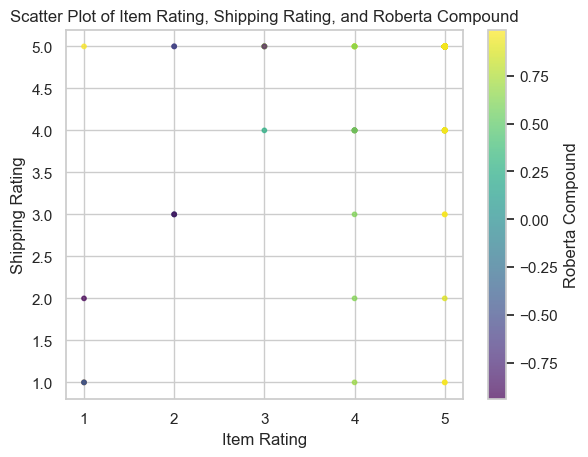

In [262]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Create a scatter plot with adjustments
  # Increase plot size
scatter = plt.scatter(
    x=results_df3['ItemRating'],
    y=results_df3['ShippingRating'],
    c=results_df3['roberta_compound'],
    cmap='viridis',
    s=10,  # Reduce marker size
    alpha=0.7
)

# Add labels and title
plt.xlabel('Item Rating')
plt.ylabel('Shipping Rating')
plt.title('Scatter Plot of Item Rating, Shipping Rating, and Roberta Compound')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Roberta Compound')

# Show the plot
plt.show()

In [273]:
results_df5 = results_df3.copy()

In [275]:
# Filling NaN values in Item Rating Column
def map_roberta_to_item_rating(roberta_compound):
    if 0.75 <= roberta_compound <= 1.0:
        return 5.0
    elif 0.5 <= roberta_compound < 0.75:
        return 4.0
    elif 0.0 <= roberta_compound < 0.5:
        return 3.0
    elif -0.5 <= roberta_compound < 0.0:
        return 2.0
    elif -1.0 <= roberta_compound < -0.5:
        return 1.0
    else:
        return None  # Handle other cases or return a default value if needed

# Apply the custom function to fill NaN values in ItemRating column
results_df5['ItemRating'] = results_df5['ItemRating'].combine_first(results_df5['roberta_compound'].apply(map_roberta_to_item_rating))

# Show the updated DataFrame
results_df5

,Id,roberta_neg,roberta_neu,roberta_pos,roberta_compound,Reviews,ItemRating,ShippingRating
0,1,0.001119,0.013271,0.985610,0.984491,Very beautiful earrings. Will definitely buy m...,5.0,5.0
1,2,0.001534,0.007493,0.990972,0.989438,Beautiful earrings. Fast shipping. Can’t wait ...,5.0,5.0
2,3,0.001942,0.012511,0.985547,0.983606,These earrings are absolutely beautiful.,5.0,5.0
3,4,0.001405,0.010884,0.987711,0.986305,Stunning earrings they look absolutely beautif...,5.0,5.0
4,5,0.001291,0.010052,0.988657,0.987366,"Truly beautiful earrings, quick delivery and s...",5.0,5.0
5,6,0.002169,0.011044,0.986787,0.984618,Love these earring so much!,5.0,5.0
6,7,0.001105,0.007194,0.991701,0.990596,Beautifully packaged & exceptional quality ite...,5.0,5.0
7,8,0.003927,0.026799,0.969274,0.965346,Great product. Very good quality for price,5.0,5.0
8,9,0.001634,0.013453,0.984913,0.983279,Great product five stars yay,5.0,5.0
9,10,0.002415,0.026461,0.971124,0.968709,Great quality! Will be ordering again,5.0,5.0


In [267]:
results_df3

,Id,roberta_neg,roberta_neu,roberta_pos,roberta_compound,Reviews,ItemRating,ShippingRating
0,1,0.001119,0.013271,0.985610,0.984491,Very beautiful earrings. Will definitely buy m...,5.0,5.0
1,2,0.001534,0.007493,0.990972,0.989438,Beautiful earrings. Fast shipping. Can’t wait ...,5.0,5.0
2,3,0.001942,0.012511,0.985547,0.983606,These earrings are absolutely beautiful.,5.0,5.0
3,4,0.001405,0.010884,0.987711,0.986305,Stunning earrings they look absolutely beautif...,5.0,5.0
4,5,0.001291,0.010052,0.988657,0.987366,"Truly beautiful earrings, quick delivery and s...",5.0,5.0
5,6,0.002169,0.011044,0.986787,0.984618,Love these earring so much!,5.0,5.0
6,7,0.001105,0.007194,0.991701,0.990596,Beautifully packaged & exceptional quality ite...,5.0,5.0
7,8,0.003927,0.026799,0.969274,0.965346,Great product. Very good quality for price,5.0,5.0
8,9,0.001634,0.013453,0.984913,0.983279,Great product five stars yay,5.0,5.0
9,10,0.002415,0.026461,0.971124,0.968709,Great quality! Will be ordering again,5.0,5.0


In [278]:
dd=pd.merge(results_df5[['ItemRating']], results_df3[['roberta_compound','ItemRating']], left_index=True, right_index=True)
dd

,ItemRating_x,roberta_compound,ItemRating_y
0,5.0,0.984491,5.0
1,5.0,0.989438,5.0
2,5.0,0.983606,5.0
3,5.0,0.986305,5.0
4,5.0,0.987366,5.0
5,5.0,0.984618,5.0
6,5.0,0.990596,5.0
7,5.0,0.965346,5.0
8,5.0,0.983279,5.0
9,5.0,0.968709,5.0


In [280]:
# filling shipping column
results_df5['ShippingRating'].fillna(2.5, inplace=True)
results_df5

,Id,roberta_neg,roberta_neu,roberta_pos,roberta_compound,Reviews,ItemRating,ShippingRating
0,1,0.001119,0.013271,0.985610,0.984491,Very beautiful earrings. Will definitely buy m...,5.0,5.0
1,2,0.001534,0.007493,0.990972,0.989438,Beautiful earrings. Fast shipping. Can’t wait ...,5.0,5.0
2,3,0.001942,0.012511,0.985547,0.983606,These earrings are absolutely beautiful.,5.0,5.0
3,4,0.001405,0.010884,0.987711,0.986305,Stunning earrings they look absolutely beautif...,5.0,5.0
4,5,0.001291,0.010052,0.988657,0.987366,"Truly beautiful earrings, quick delivery and s...",5.0,5.0
5,6,0.002169,0.011044,0.986787,0.984618,Love these earring so much!,5.0,5.0
6,7,0.001105,0.007194,0.991701,0.990596,Beautifully packaged & exceptional quality ite...,5.0,5.0
7,8,0.003927,0.026799,0.969274,0.965346,Great product. Very good quality for price,5.0,5.0
8,9,0.001634,0.013453,0.984913,0.983279,Great product five stars yay,5.0,5.0
9,10,0.002415,0.026461,0.971124,0.968709,Great quality! Will be ordering again,5.0,5.0


In [296]:
results_df5 =results_df5[~(results_df5.Id == 282)]


In [294]:
results_df5 = results_df5[~(results_df5['Id'] == 558)]

In [298]:
results_df5[(results_df5.Id == 282)]


,Id,roberta_neg,roberta_neu,roberta_pos,roberta_compound,Reviews,ItemRating,ShippingRating


In [299]:
import pickle

In [300]:
with open('lin_model.pkl', 'wb') as file:
    pickle.dump(lin_model, file)

print("Linear Regression model has been exported to lin_model.pkl")

Linear Regression model has been exported to lin_model.pkl


In [301]:
import json
columns = {
    'columns' : [col.lower() for col in results_df5.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [302]:
results_df5.to_csv('Etsy_preprocessed.csv', index=False)

print("DataFrame has been saved to csv")

DataFrame has been saved to csv


In [303]:
with open('roberta_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Linear Regression model has been exported to lin_model.pkl")

Linear Regression model has been exported to lin_model.pkl
